# WIP - to revise

# Mise en place

In [1]:
import micom as mc
import numpy as np
import matplotlib as mp 
import matplotlib.pyplot as plt

from utils import *
from utilPlots import *


In [2]:
# Load pre-built model (Should be quicker)
com = mc.load_pickle("../../data/community.pickle")
# View dataframe used to build the communty with the taxonomy attribute.
# Note that the abundance column has been populated with default values.
com.taxonomy

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-10
Read LP format model from file C:\Users\domin\AppData\Local\Temp\tmpdkzeahpv.lp
Reading time = 0.07 seconds
: 4042 rows, 11287 columns, 43241 nonzeros


,id,genus,species,file,abundance
id,,,,,
AG_uc,AG_uc,ecoli,Ecoli AG,project/data/AG.xml,0.5
GD_uc,GD_uc,ecoli,Ecoli GD,project/data/GD.xml,0.5


In [3]:
# Visual conformation of community conditions 
com.medium

{'EX_co2_m': 1000.0,
 'EX_cobalt2_m': 1000.0,
 'EX_glc__D_m': 10.0,
 'EX_h_m': 1000.0,
 'EX_h2o_m': 1000.0,
 'EX_k_m': 1000.0,
 'EX_cu2_m': 1000.0,
 'EX_mg2_m': 1000.0,
 'EX_mn2_m': 1000.0,
 'EX_mobd_m': 1000.0,
 'EX_na1_m': 1000.0,
 'EX_nh4_m': 1000.0,
 'EX_ca2_m': 1000.0,
 'EX_cbl1_m': 0.01,
 'EX_ni2_m': 1000.0,
 'EX_o2_m': 1000.0,
 'EX_cl_m': 1000.0,
 'EX_pi_m': 1000.0,
 'EX_xyl__D_m': 10.0,
 'EX_zn2_m': 1000.0,
 'EX_sel_m': 1000.0,
 'EX_slnt_m': 1000.0,
 'EX_so4_m': 1000.0,
 'EX_tungs_m': 1000.0,
 'EX_fe2_m': 1000.0,
 'EX_fe3_m': 1000.0}

In [4]:
# Add target reactions to the internal_exchange reaction attribute for easy visualisation.
target_rxns = []
target_rxns.append(com.reactions.EX_Tyrosol_e__AG_uc)
target_rxns.append(com.reactions.EX_Salidroside_e__GD_uc)
com.internal_exchanges.append(target_rxns)

In [5]:
com.internal_exchanges[-1]

Reaction identifier,EX_Salidroside_e__GD_uc
Name,Salidroside Exchange
Memory address,0x021578113d00
Stoichiometry,Salidroside_e__GD_uc <=> 0.5 Salidroside_m 8-O-b-D-glucoside of tyrosol (salidroside) <=> 0.5 8-O-b-D-glucoside of tyrosol (salidroside)
GPR,
Lower bound,-100
Upper bound,1000.0


In [6]:
# Create an array to store our solution objects
sols = {}

# Functions

In [7]:
# # Diff fluxes
# def diff_internalExFluxes(com,A,B):
#     '''
#     Compares the fluxes of two cooperative tradeoff solutions from MICOM and outputs the difference between 
#     internal exhange reaction fluxes in the two input scenarios. 

#     Args:
#         com: The micom/cobrapy community model underlying the scenarios, required for the exchange fluxe id's
#         A: Micom cooperative tradeoff solution object.
#         B: Micom cooperative tradeoff solution object.

#     Returns:
#         x: Dataframe containing both the flux values for the internal exchanges of both scenarios for each strain, 
#         but also the difference between scenarios for each strain.

#     Raises:
#         None
#     '''
#     x = A.fluxes.T.compare(B.fluxes.T) # Handy function this
#     x['AG_diff'] = x.AG_uc.other - x.AG_uc.self # positive values mean t4 has x amount greatr flux than t1 etc
#     x['GD_diff'] = x.GD_uc.other - x.GD_uc.self # positive values mean t4 has x amount greatr flux than t1 etc
#     x['medium_diff'] = x.medium.other - x.medium.self # positive values mean t4 has x amount greater flux than t1 etc # not needed.
    
#     # Grab names of internal exchange fluxes and trim to make compatible with flux output. 
#     int_ex = [i.id for i in com.internal_exchanges]
#     int_ex = [i[:-7] for i in int_ex]
#     # int_ex

#     # Narrow focus to exchange fluxes
#     x = x[x.index.isin(int_ex)].rename(columns={'self': 'testA', 'other': 'testB'}, level=-1).sort_values(by=['GD_diff'], ascending = True)
#     # x.drop(["medium","medium_diff"])
#     del x["medium"]
#     del x["medium_diff"]
    
#     return x


# # diff_internalExFluxes(com,t1,t4).head()



In [14]:

# def getInternalExchangeFluxes(com, sol):
#     int_ex = [i.id for i in com.internal_exchanges]
#     int_ex = [i[:-7] for i in int_ex]

#     x = sol.fluxes.T

#     x = x[x.index.isin(int_ex)].sort_values(by=['GD_uc'], ascending = True)
    
#     x = x.drop(columns = ["medium"]) # Remove superflous medium column
#     x = x.fillna(0)
#     x = x[((x.AG_uc != 0) | (x.GD_uc != 0))] # reduce to a meaningul subset of exchange reactions by removing NAN's & zeros etc
#     # x = x[((x.AG_uc != 0) | (x.GD_uc != 0)) & (abs(x.AG_uc) + abs(x.GD_uc) > 0)] # reduce to a meaningul subset of exchange reactions by removing NAN's & zeros etc
    
#     return x

# temp = getInternalExchangeFluxes(com,t5)
# temp


In [13]:
# Plot reactions on a log scale.

# def plot_IntExchDiff(x,_title="Differences Between Internal Exchange Reactions; Scenario x vs Scenario x"):
#     fig, ax = plt.subplots(figsize=(20,10))
#     x_vals = np.arange(len(x.index))

#     y1 = [i for i in x.AG_diff]
#     y2 = [i for i in x.GD_diff]

#     width = 0.4
#     offset = width//2

#     ax.bar(x_vals + 0.1, y1, width=width, label="AG")
#     ax.bar(x_vals - 0.1, y2, width=width, label="GD")

#     ax.tick_params("x", rotation=90)
#     ax.set_xticks(x_vals,[i for i in x.index])
#     ax.tick_params(axis='y', labelsize=20)

#     ax.set_yscale('symlog')

#     ax.set_xlabel('Internal Exhange Reaction',fontsize=20)
#     ax.set_ylabel('Flux Value Difference',fontsize=20)

#     ax.legend()
#     ax.set_title(f"{_title}",fontsize=30)
#     # ax.title.set_size(40)

#     ax.grid()
#     fig.savefig(f"C:/Users/domin/Masters-Thesis---Draft-1/images/Micom_Tests/{_title}.pdf", bbox_inches = 'tight',pad_inches=0.2)
    




# def plotIntExchFlux(com, exchngFluxes, _title = "Internal Exchange Flux Values - Scenario X"):
#     # int_ex = [i.id for i in com.internal_exchanges]
#     # int_ex = [i[:-7] for i in int_ex]

#     # x = sol.fluxes.T

#     # x = x[x.index.isin(int_ex)].rename(columns={'self': 'testA', 'other': 'testB'}, level=-1).sort_values(by=['GD_uc'], ascending = False)
    
#     # Start plotting
#     fig, ax = plt.subplots(figsize=(20,10))
#     x_vals = np.arange(len(exchngFluxes.index))

#     y1 = [i for i in exchngFluxes.AG_uc]
#     y2 = [i for i in exchngFluxes.GD_uc]

#     width = 0.4
#     offset = width//2

#     ax.bar(x_vals + 0.1, y1, width=width, label="AG")
#     ax.bar(x_vals - 0.1, y2, width=width, label="GD")

#     ax.tick_params("x", rotation=90, labelsize=15)
#     ax.set_xticks(x_vals,[i for i in exchngFluxes.index])
#     ax.tick_params(axis='y', labelsize=20)

#     # print(ax.get_ylim())
#     # ax.set_yscale('log')
#     ax.set_yscale('symlog')

#     ax.set_xlabel('Internal Exhange Reaction',fontsize=20)
#     ax.set_ylabel('Flux Value Difference',fontsize=20)

#     ax.legend()
#     ax.set_title(f"{_title}",fontsize=30)
#     # ax.title.set_size(40)

#     ax.grid()

#     fig.savefig(f"C:/Users/domin/Masters-Thesis---Draft-1/images/Micom_Tests/{_title}.pdf", bbox_inches = 'tight',pad_inches=0.2)
    

# temp = getInternalExchangeFluxes(com,t1)
# print(temp)
# plotIntExchFlux(com,temp,"Internal Exchange Flux Values - Scenario 1")

In [12]:
com.reactions.BIOMASS_Ec_iJO1366_WT_53p95M__AG_uc
com.reactions.BIOMASS_Ec_iHK1487_core__GD_uc



NameError: name 'AG' is not defined

# Micom Tests

Things to establish:


Visiualisations:
- Cross feeding metabolites; Subset will be all species specific exchange reactions - could have a bar chart with a negative axis and plot each species by colour on this. Would need a full set of reactions - this is provided from the model.internal exchanged attribute

## Test 0 - Cooperative Tradeoff with No Auxotrophic Cross Feeding
For this we need to restore the ability of AG to synthesise Tyrosine



In [9]:
# Restore Phenylalanine production ability for AG
# m.reactions.PPNDH.upper_bound = 1000 
tradeoffscan = []
with com as m:
    # Restore Phenylalanine production ability for AG
    com.reactions.PPNDH__AG_uc.bounds = (0,1000)
    # Restore Tyrosine Production for GD  
    com.reactions.PPND__GD_uc.bounds = (0,1000)
    tradeoffscan.append(com.cooperative_tradeoff(fraction = 0.5, pfba=True, fluxes=True))
    # tradeoffscan = com.cooperative_tradeoff(fraction = np.arange(0,1 + 1E-06,0.1), fluxes=True,pfba=True)

t0 = tradeoffscan[0]
t0


,abundance,growth_rate,reactions,metabolites
compartments,,,,
AG_uc,0.5,0.911178,2587,1808
GD_uc,0.5,0.911319,2705,1880
medium,NaN,NaN,351,351


compartment       AG_uc      GD_uc
reaction                          
EX_o2_e      -17.191701 -21.097114
EX_glc__D_e    0.000000 -14.034132
EX_nh4_e     -10.132386  -9.550550
EX_pi_e       -0.878950  -0.878552
EX_so4_e      -0.229808  -0.229489
EX_asn__L_e    0.219678  -0.219678
EX_k_e        -0.177855  -0.177883
EX_his__L_e    0.086336  -0.086336
EX_fe2_e      -0.014634  -0.014638
EX_mg2_e      -0.007904  -0.007906
EX_cl_e       -0.004743  -0.004744
EX_ca2_e      -0.004743  -0.004744
EX_cu2_e      -0.000646  -0.000646
EX_mn2_e      -0.000630  -0.000630
EX_ade_e       0.000613  -0.000613
EX_zn2_e      -0.000311  -0.000311
EX_ni2_e      -0.000294  -0.000294
EX_cobalt2_e  -0.000023  -0.000023
EX_mobd_e     -0.000118  -0.000006
EX_xyl__D_e   -6.768612   0.000000
EX_meoh_e      0.000002   0.000002
EX_leu__L_e   -0.410514   0.410514
EX_ac_e        0.000000   0.530559
EX_dha_e      -6.902924   6.902924
EX_h_e         8.663029   8.612820
EX_co2_e      18.212750  23.965561
EX_h2o_e      43.049

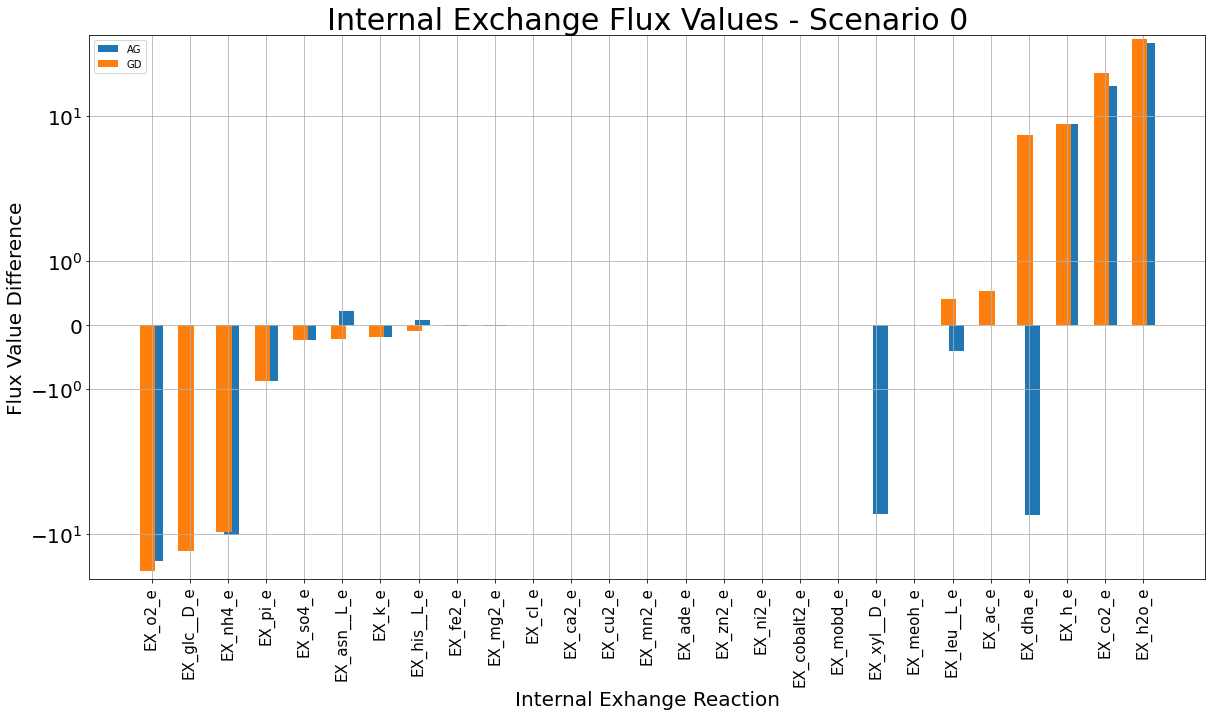

In [11]:
temp = getInternalExchangeFluxes(com,t0)
print(temp)
plotIntExchFlux(com,temp,"Internal Exchange Flux Values - Scenario 0",save_output=True)

In [28]:
com.cooperative_tradeoff(fraction=0.96,fluxes=False,pfba=False)

,abundance,growth_rate,reactions,metabolites
compartments,,,,
AG_uc,0.5,1.749599,2587,1808
GD_uc,0.5,1.749595,2705,1880
medium,NaN,NaN,351,351


In [40]:
# temp = tradeoffscan._get_value(0.4, "solution")
# temp.members
# tradeoffscan
# Why are these all the same objective function value?
tradeoffscan.values

array([[1.0, <CommunitySolution 1.822 at 0x2361a7afd30>],
       [0.9, <CommunitySolution 1.822 at 0x2361c5162c0>],
       [0.8, <CommunitySolution 1.822 at 0x2361c517ee0>],
       [0.7000000000000001, <CommunitySolution 1.822 at 0x2361c517010>],
       [0.6000000000000001, <CommunitySolution 1.822 at 0x2361c517430>],
       [0.5, <CommunitySolution 1.822 at 0x2361c517610>],
       [0.4, <CommunitySolution 1.822 at 0x2361c5161a0>],
       [0.30000000000000004, <CommunitySolution 1.822 at 0x2361c5160e0>],
       [0.2, <CommunitySolution 1.822 at 0x2361c515ab0>],
       [0.1, <CommunitySolution 1.822 at 0x2361c515570>],
       [0.0, <CommunitySolution 1.822 at 0x2361c516bf0>]], dtype=object)

In [ ]:
import matplotlib as mp
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
# plt.figure(figsize=(5, 5), dpi=200)
ax.plot(tradeoffscan["fraction"],tradeoffscan["AG_uc"],label="AG uc",linestyle = ":")
ax.plot(tradeoffscan["fraction"],tradeoffscan["GD_uc"],label="GD uc",linestyle = ":")
ax.plot(tradeoffscan["fraction"], [i.growth_rate for i in sols.solution.values],label="Com",linestyle = "-.")

ax.set_title("AG vs GD Growth Rates (No Enforced Mutualism")
ax.set_xlabel("Cooperative Tradeoff Value")
ax.set_ylabel("Consitiuent Growth Rate")
ax.legend()

## Test 1 - Cooperative tradeoff with 'normal' cross-feeding

In [9]:
with com as m: 
    sols["t1"] = com.cooperative_tradeoff(fraction = 0.5, pfba=True, fluxes=True)

t1 = sols["t1"]

In [10]:
t1

,abundance,growth_rate,reactions,metabolites
compartments,,,,
AG_uc,0.5,0.908383,2587,1808
GD_uc,0.5,0.914114,2705,1880
medium,NaN,NaN,351,351


In [43]:
for i in com.constraints:
    print(i)
    break

cm_e__AG_uc: 0.0 <= -1.0*CMtex__AG_uc + 1.0*CMtex__AG_uc_reverse_58651 + 1.0*CMtpp__AG_uc - 1.0*CMtpp__AG_uc_reverse_89392 - 1.0*EX_cm_e__AG_uc + 1.0*EX_cm_e__AG_uc_reverse_c3eb3 <= 0.0


In [11]:
# t1.fluxes.T.GD_uc.index
x = t1.fluxes.T.filter(like = 'glc', axis=0)
x

compartment,AG_uc,GD_uc,medium
reaction,,,
EX_2ddglcn_e,0.0,0.000000,NaN
EX_2ddglcn_m,NaN,NaN,0.000000
EX_2dglc_e,NaN,0.000000,NaN
EX_2dglc_m,NaN,NaN,0.000000
EX_5dglcn_e,0.0,0.000000,NaN
EX_5dglcn_m,NaN,NaN,0.000000
EX_glc__D_e,0.0,-14.155182,NaN
EX_glc__D_m,NaN,NaN,-7.077591
EX_glcn_e,0.0,0.000000,NaN


In [451]:
# Useful gubbins for analysis
# x = t1.fluxes.T.filter(like = 'xyl__D', axis=0)
# com.reactions.GLCtex_copy1__AG_uc.bounds = (0,0)
# com.reactions.GLCtex_copy2__AG_uc.bounds = (0,0)

### Graphing

In [452]:
t1.fluxes.T.to_clipboard()

compartment       AG_uc      GD_uc
reaction                          
EX_o2_e      -17.116641 -21.171612
EX_glc__D_e    0.000000 -14.155182
EX_nh4_e     -10.063558  -9.619374
EX_pi_e       -0.876254  -0.881246
EX_so4_e      -0.229103  -0.230193
EX_asn__L_e    0.220352  -0.220352
EX_k_e        -0.177310  -0.178428
EX_tyr__L_e    0.126257  -0.126257
EX_his__L_e    0.086601  -0.086601
EX_fe2_e      -0.014590  -0.014683
EX_mg2_e      -0.007880  -0.007930
EX_ca2_e      -0.004728  -0.004758
EX_cl_e       -0.004728  -0.004758
EX_cu2_e      -0.000644  -0.000648
EX_mn2_e      -0.000628  -0.000632
EX_ade_e       0.000611  -0.000611
EX_zn2_e      -0.000310  -0.000312
EX_ni2_e      -0.000293  -0.000295
EX_cobalt2_e  -0.000023  -0.000023
EX_mobd_e     -0.000117  -0.000006
EX_xyl__D_e   -6.623890   0.000000
EX_meoh_e      0.000002   0.000002
EX_phe__L_e   -0.168292   0.168292
EX_leu__L_e   -0.409255   0.409255
EX_ac_e        0.000000   0.532186
EX_dha_e      -6.921983   6.921983
EX_h_e         8.598

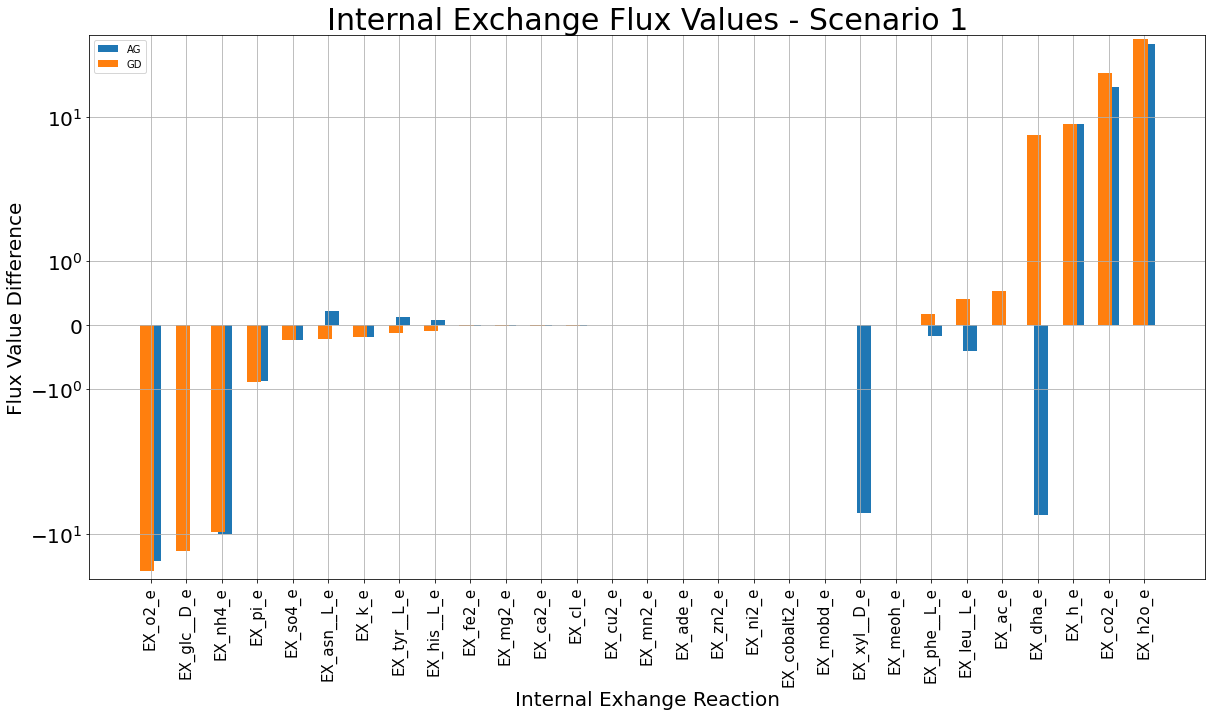

In [15]:
temp = getInternalExchangeFluxes(com,t1)
print(temp)
plotIntExchFlux(com,temp,"Internal Exchange Flux Values - Scenario 1")

## Test 2 - CoopTrad without Glucose
Expect growth ability of GD to be compromised

In [454]:
with com as m: 

    m.reactions.EX_glc__D_m.lower_bound = 0 # Turn off Glucose availibility
    sols["t2"] = m.cooperative_tradeoff(fraction = 0.5, pfba=True, fluxes=True)

t2 = sols["t2"] # get handle 
t2

,abundance,growth_rate,reactions,metabolites
compartments,,,,
AG_uc,0.5,0.406527,2587,1808
GD_uc,0.5,0.406603,2705,1880
medium,NaN,NaN,351,351


In [455]:
print(com.reactions.EX_xyl__D_m.bounds)
print(com.reactions.EX_xyl__D_e__AG_uc.bounds)
print(com.reactions.EX_xyl__D_e__GD_uc.bounds)

(-10.0, 1000.0)
(-100, 1000.0)
(-100, 1000.0)


### Graph Internal Exchange Fluxes

compartment          AG_uc         GD_uc
reaction                                
EX_o2_e      -1.061398e+01 -8.939567e+00
EX_dha_e      3.961438e+00 -3.961438e+00
EX_nh4_e     -7.518534e+00 -1.263251e+00
EX_adn_e      6.207801e-01 -6.207801e-01
EX_akg_e      4.339729e-01 -4.339729e-01
EX_pi_e      -3.921484e-01 -3.919828e-01
EX_ser__L_e   3.082077e-01 -3.082077e-01
EX_gly_e      1.859721e-01 -1.859721e-01
EX_leu__L_e   1.831870e-01 -1.831870e-01
EX_ins_e      1.817328e-01 -1.817328e-01
EX_quin_e     1.510077e-01 -1.510077e-01
EX_lys__L_e   1.395303e-01 -1.395303e-01
EX_arg__L_e   1.202700e-01 -1.202700e-01
EX_ile__L_e   1.181300e-01 -1.181300e-01
EX_so4_e     -1.025301e-01 -1.023911e-01
EX_asn__L_e   9.801362e-02 -9.801362e-02
EX_pro__L_e   8.988149e-02 -8.988149e-02
EX_k_e       -7.935119e-02 -7.936588e-02
EX_thr__L_e   6.915655e-02 -6.915655e-02
EX_cytd_e     6.529124e-02 -6.529124e-02
EX_uri_e      5.859289e-02 -5.859289e-02
EX_tyr__L_e   5.615974e-02 -5.615974e-02
EX_his__L_e   3.

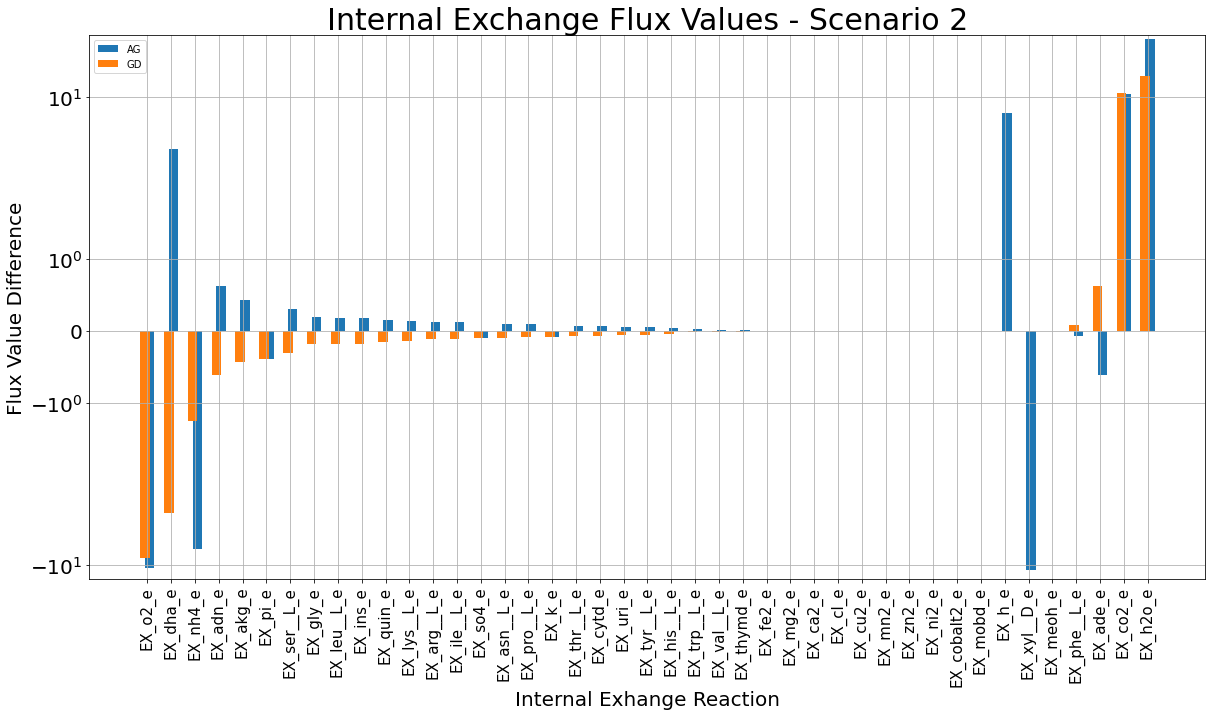

In [456]:
temp = getInternalExchangeFluxes(com,t2)
print(temp)
plotIntExchFlux(com,temp,"Internal Exchange Flux Values - Scenario 2")

### Graph Differences: 1 vs 2

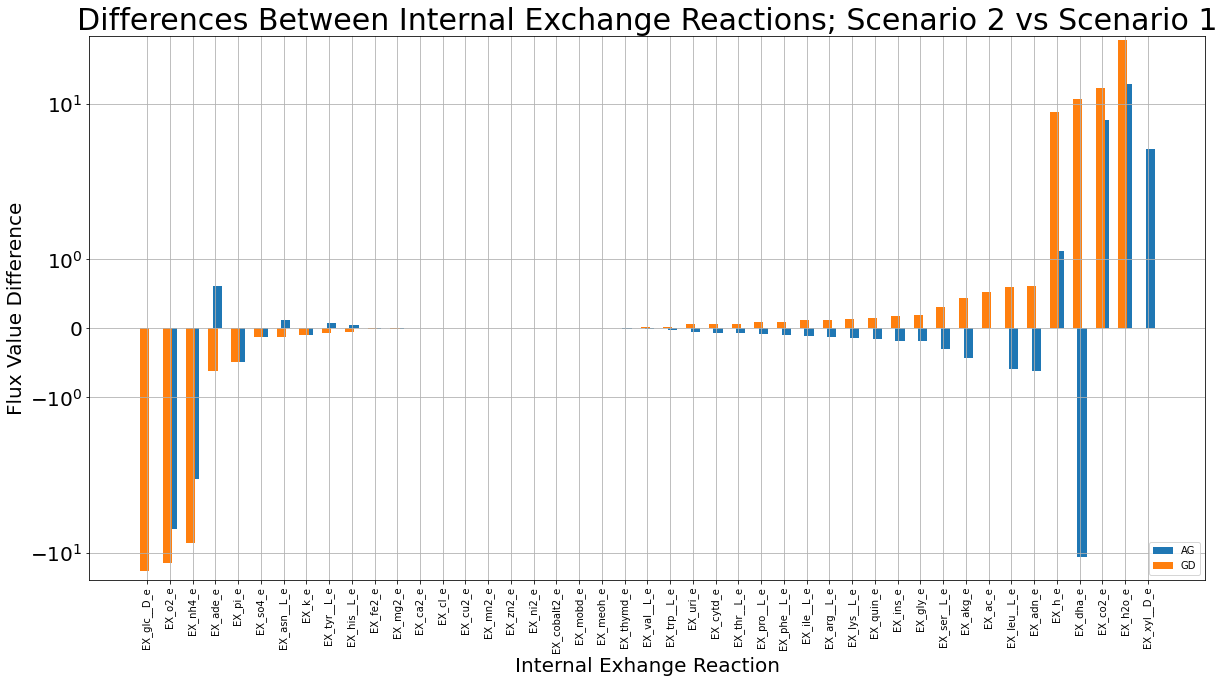

In [457]:
x = diff_internalExFluxes(com,t2,t1)
# x.to_clipboard()
plot_IntExchDiff(x,"Differences Between Internal Exchange Reactions; Scenario 2 vs Scenario 1")


## Test 3 - CoopTrad without Xylose
Expect growth ability of AG to be compromised

In [458]:
with com as m: 

    m.reactions.EX_xyl__D_m.lower_bound = 0 # Turn off xylose availibility
    sols["t3"] = m.cooperative_tradeoff(fraction = 0.5, pfba=True, fluxes=True)

t3 = sols["t3"] # get handle 
t3

,abundance,growth_rate,reactions,metabolites
compartments,,,,
AG_uc,0.5,0.495944,2587,1808
GD_uc,0.5,0.495928,2705,1880
medium,NaN,NaN,351,351


### Graphing

compartment          AG_uc         GD_uc
reaction                                
EX_o2_e      -9.429820e+00 -1.299952e+01
EX_glc__D_e   0.000000e+00 -1.097286e+01
EX_nh4_e     -5.248150e+00 -5.464048e+00
EX_pi_e      -4.784030e-01 -4.780959e-01
EX_so4_e     -1.250820e-01 -1.248850e-01
EX_k_e       -9.680480e-02 -9.680146e-02
EX_tyr__L_e   6.849725e-02 -6.849725e-02
EX_his__L_e   4.698308e-02 -4.698308e-02
EX_fe2_e     -7.965357e-03 -7.965605e-03
EX_mg2_e     -4.302314e-03 -4.302287e-03
EX_ca2_e     -2.581389e-03 -2.581372e-03
EX_cl_e      -2.581389e-03 -2.581372e-03
EX_cu2_e     -3.516243e-04 -3.514968e-04
EX_mn2_e     -3.426973e-04 -3.428923e-04
EX_zn2_e     -1.691169e-04 -1.690799e-04
EX_ni2_e     -1.601899e-04 -1.600451e-04
EX_cobalt2_e -1.239860e-05 -1.247665e-05
EX_mobd_e    -6.397678e-05 -3.441828e-06
EX_meoh_e     9.918880e-07  9.918555e-07
EX_glu__L_e  -2.581389e-03  2.581389e-03
EX_phe__L_e  -9.188107e-02  9.188107e-02
EX_akg_e     -1.381427e-01  1.381427e-01
EX_leu__L_e  -2.

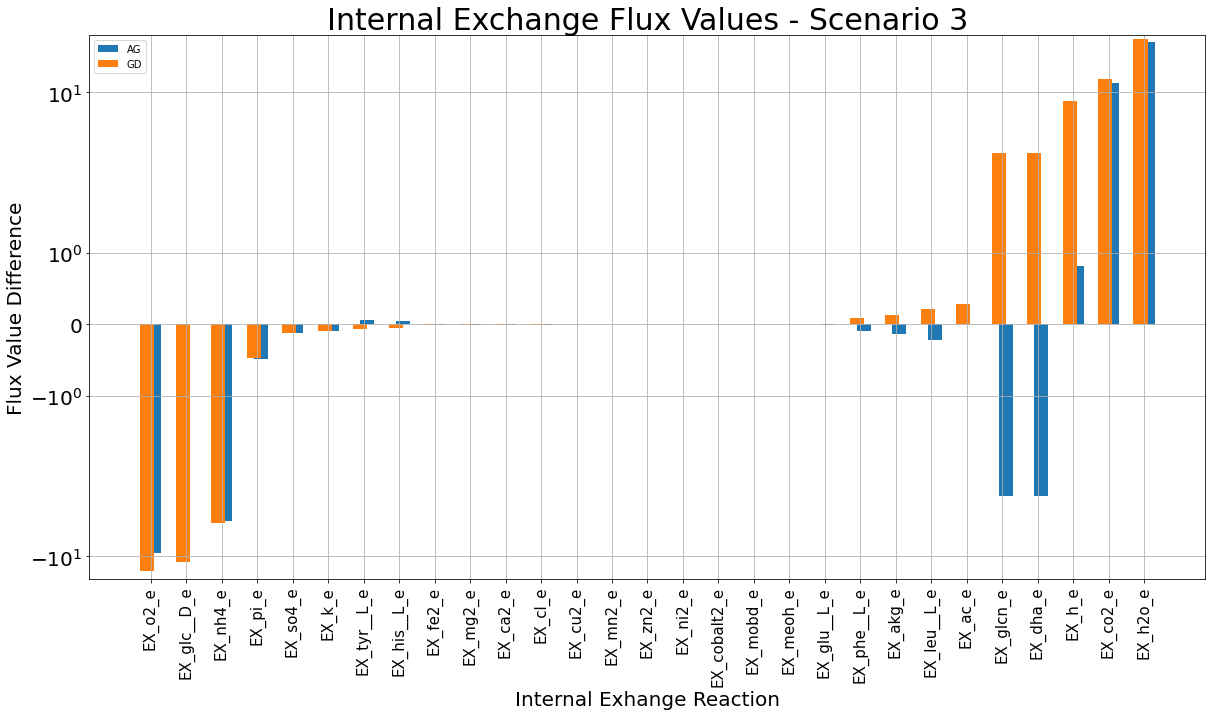

In [459]:
temp = getInternalExchangeFluxes(com,t3)
print(temp)
plotIntExchFlux(com,temp,"Internal Exchange Flux Values - Scenario 3")

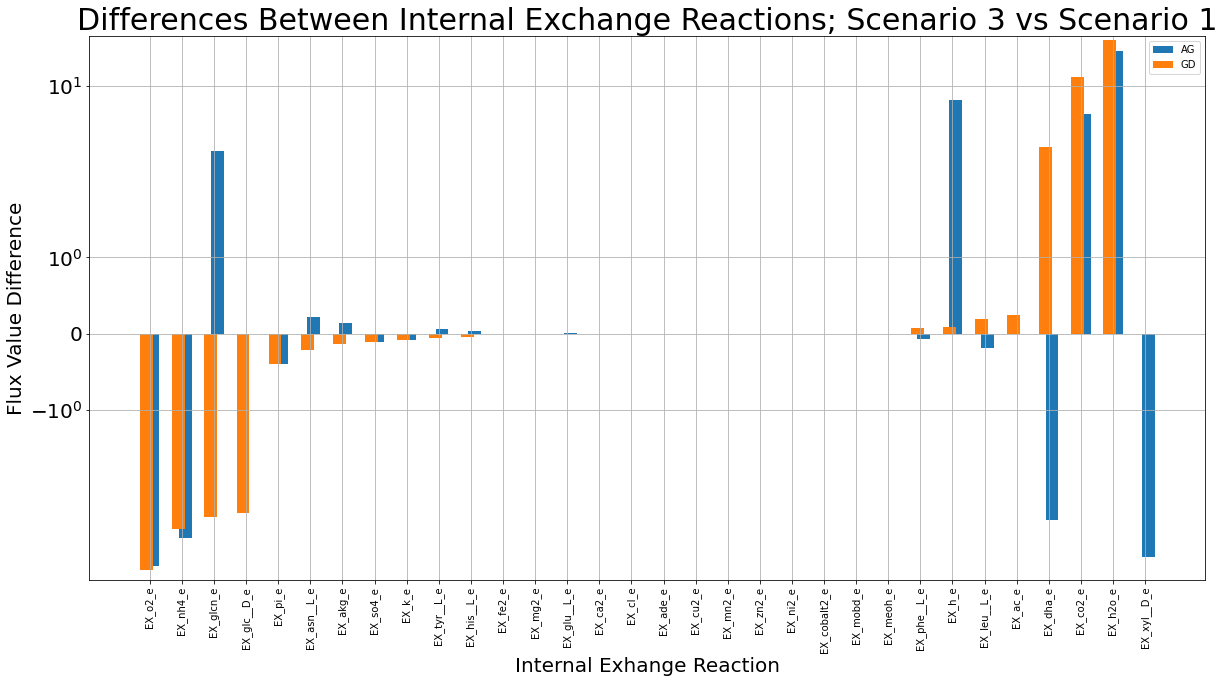

In [460]:
x = diff_internalExFluxes(com,t3,t1)
# x.to_clipboard()
plot_IntExchDiff(x,"Differences Between Internal Exchange Reactions; Scenario 3 vs Scenario 1")

## Test 4 - Cooptrad with Growth Coupled GD Strain (GC#1)
Apply the growth couple reactions to GD in community.

In [461]:
with com as m: 

    # impose growth couple by directly constraining reactions on the GD strain.
    strat1 = [
        'TALA__GD_uc',
        'EDD__GD_uc',
        'FBA__GD_uc',
        'F6PA__GD_uc',
        'PPM2__GD_uc',
        'AGM4PApp__GD_uc',
        'INDOLEt2pp__GD_uc',
        'AGM3PApp__GD_uc'] # Target reactions to zero

    # Access reactions in the com and set bounds to 0 
    for r in [i for i in m.reactions if i.id in strat1]:
        r.bounds = (0,0)
        print("Setting ", r.id, r.bounds)

    sols["t4"] = m.cooperative_tradeoff(fraction = 0.5, pfba=True, fluxes=True)

t4 = sols["t4"] # get handle 
t4

Setting  FBA__GD_uc (0, 0)
Setting  TALA__GD_uc (0, 0)
Setting  EDD__GD_uc (0, 0)
Setting  F6PA__GD_uc (0, 0)
Setting  PPM2__GD_uc (0, 0)
Setting  AGM4PApp__GD_uc (0, 0)
Setting  INDOLEt2pp__GD_uc (0, 0)
Setting  AGM3PApp__GD_uc (0, 0)


,abundance,growth_rate,reactions,metabolites
compartments,,,,
AG_uc,0.5,0.872486,2587,1808
GD_uc,0.5,0.872096,2705,1880
medium,NaN,NaN,351,351


compartment       AG_uc      GD_uc
reaction                          
EX_o2_e      -19.336150 -21.984669
EX_glc__D_e    0.000000  -9.111307
EX_akg_e       4.339515  -4.339515
EX_dha_e       3.288828  -3.288828
EX_nh4_e     -16.193170  -2.648286
EX_pi_e       -0.841627  -0.840739
EX_ser__L_e    0.661055  -0.661055
EX_glu__L_e    0.558214  -0.558214
EX_gly_e       0.398685  -0.398685
EX_leu__L_e    0.392906  -0.392906
EX_val__L_e    0.369038  -0.369038
EX_lys__L_e    0.299270  -0.299270
EX_arg__L_e    0.257959  -0.257959
EX_ile__L_e    0.253369  -0.253369
EX_so4_e      -0.220050  -0.219612
EX_ins_e       0.212165  -0.212165
EX_asn__L_e    0.210223  -0.210223
EX_pro__L_e    0.192781  -0.192781
EX_ade_e       0.178208  -0.178208
EX_k_e        -0.170303  -0.170227
EX_tyr__L_e    0.120453  -0.120453
EX_his__L_e    0.082620  -0.082620
EX_thymd_e     0.022773  -0.022773
EX_fe2_e      -0.014013  -0.014008
EX_mg2_e      -0.007569  -0.007566
EX_ca2_e      -0.004541  -0.004539
EX_cl_e       -0.004

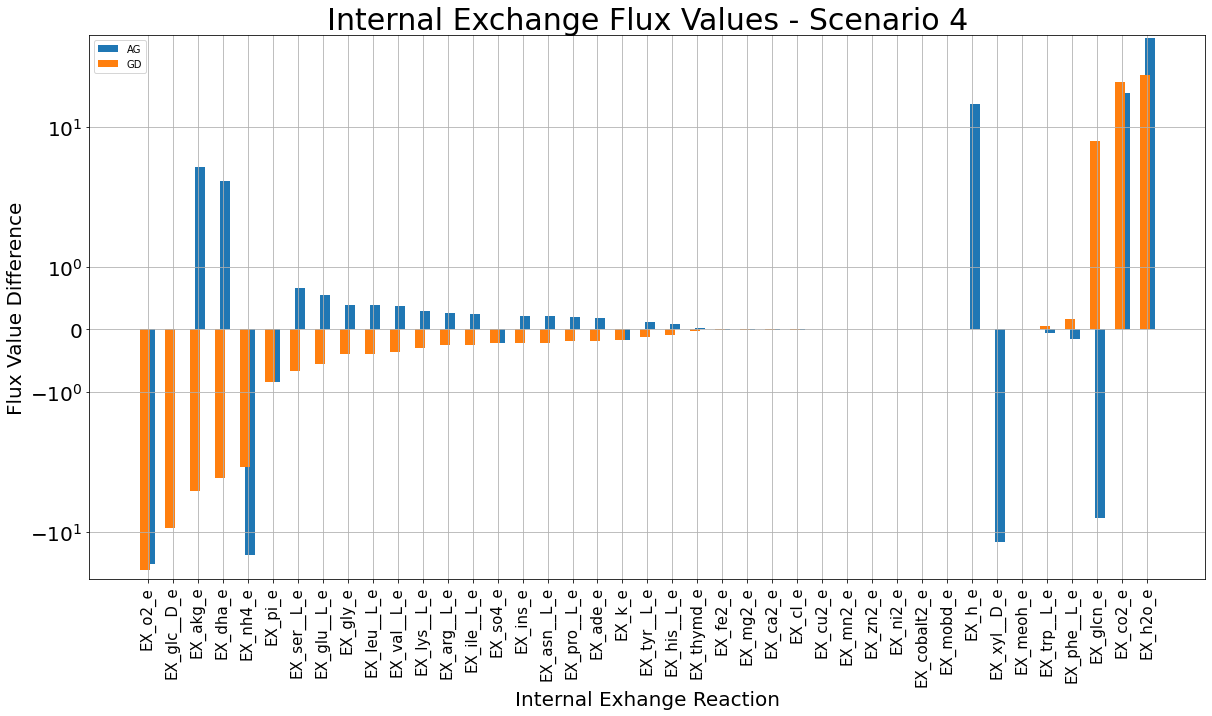

In [462]:
temp = getInternalExchangeFluxes(com,t4)
print(temp)
plotIntExchFlux(com,temp,"Internal Exchange Flux Values - Scenario 4")

### Graph: Task 1 vs task 4 - 'Normal' community vs GD GC#1 Flux differences
From this graph we can see on the left a couple of reactions for which there is greater uptake in the AG strain for the GD:coupled scenario, but a greater tendancy for the GD strain to take up the Dihydroxyacetone (dha) for example.
In this scenario I am looking for suggestions of compensating cross-feeding to account for the limitations imposed by the knock-outs intended to growth couple as no salidroside is being produced.

To explore: 
- If we limit internal exhange fluxes to bounds suggested by test 1, does this allow the community to produce salidroside?
-  

Note that negative values connote uptake by the organims and positive indicates secretion.

Note that this if for equivalent abundacne scenarios and so has not required scaling.

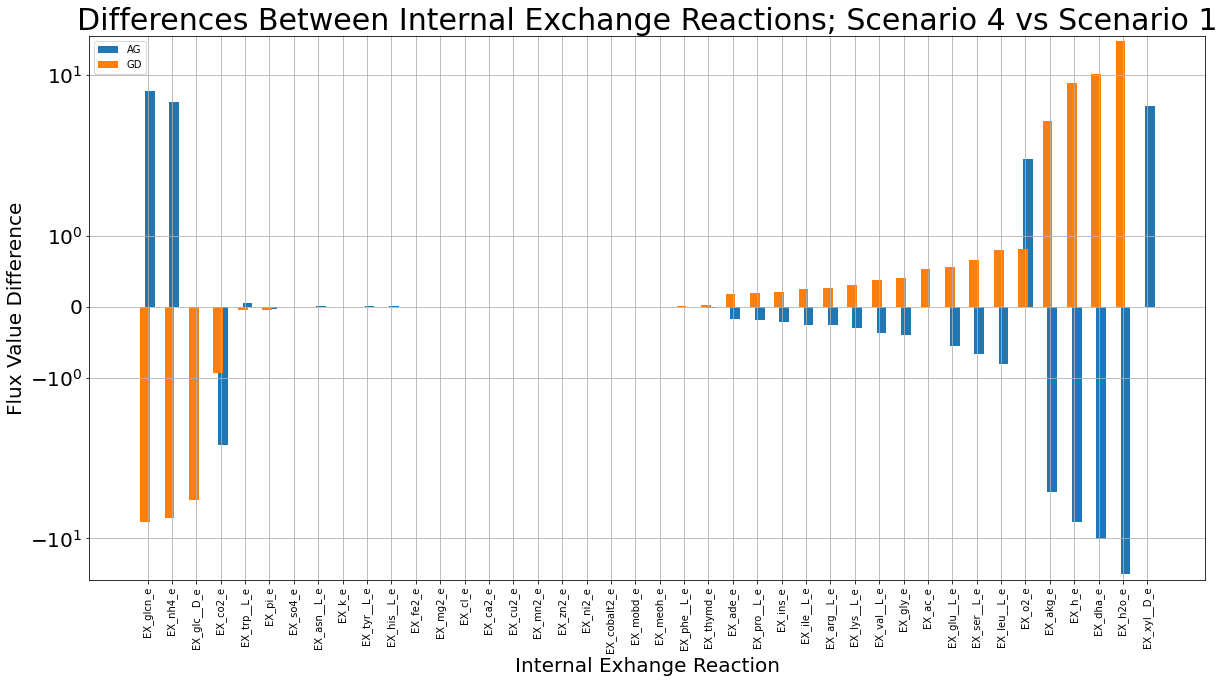

In [463]:
# Plot the differences in internal exchange fluxes between scenarios.
x = diff_internalExFluxes(com,t4,t1)
# print(x.head())
plot_IntExchDiff(x,"Differences Between Internal Exchange Reactions; Scenario 4 vs Scenario 1") 

## Test 5 - CoopTrad with Salidroside Pinned

In [464]:
# Not really 
with com as m: 

    m.reactions.SALIDROSIDE_BIOSYNTHESIS__GD_uc.bounds = (8,8) 
    sols["t5"] = m.cooperative_tradeoff(fraction = 0.5, pfba=True, fluxes=True)
    # sols["t5"] = m.cooperative_tradeoff(fraction = 1, pfba = True)

t5 = sols["t5"] # get handle 
t5

,abundance,growth_rate,reactions,metabolites
compartments,,,,
AG_uc,0.5,0.354001,2587,1808
GD_uc,0.5,0.353986,2705,1880
medium,NaN,NaN,351,351


In [465]:
t5.fluxes.T.filter(like = 'yrosol', axis=0)

compartment,AG_uc,GD_uc,medium
reaction,,,
EX_Tyrosol_e,8.0,NaN,NaN
EX_Tyrosol_m,NaN,NaN,0.0
Ex_Tyrosol_e,NaN,-8.0,NaN
Tyrosolex,8.0,8.0,NaN


### Graphing

In [466]:
t5.fluxes.T.to_clipboard()

compartment              AG_uc         GD_uc
reaction                                    
EX_glc__D_e       0.000000e+00 -1.361548e+01
EX_o2_e          -1.314710e+01 -1.356174e+01
Ex_Tyrosol_e      0.000000e+00 -8.000000e+00
EX_nh4_e         -3.881464e+00 -3.764785e+00
EX_pi_e          -3.414806e-01 -3.412578e-01
EX_so4_e         -8.928266e-02 -8.914109e-02
EX_k_e           -6.909857e-02 -6.909544e-02
EX_tyr__L_e       4.889232e-02 -4.889232e-02
EX_his__L_e       3.353583e-02 -3.353583e-02
EX_fe2_e         -5.685615e-03 -5.685731e-03
EX_mg2_e         -3.070961e-03 -3.070909e-03
EX_cl_e          -1.842577e-03 -1.842545e-03
EX_ca2_e         -1.842577e-03 -1.842545e-03
EX_cu2_e         -2.509869e-04 -2.508932e-04
EX_mn2_e         -2.446149e-04 -2.447514e-04
EX_zn2_e         -1.207144e-04 -1.206867e-04
EX_ni2_e         -1.143424e-04 -1.142378e-04
EX_cobalt2_e     -8.850032e-06 -8.905647e-06
EX_mobd_e        -4.566617e-05 -2.456726e-06
EX_xyl__D_e      -2.000000e+01  0.000000e+00
EX_meoh_e 

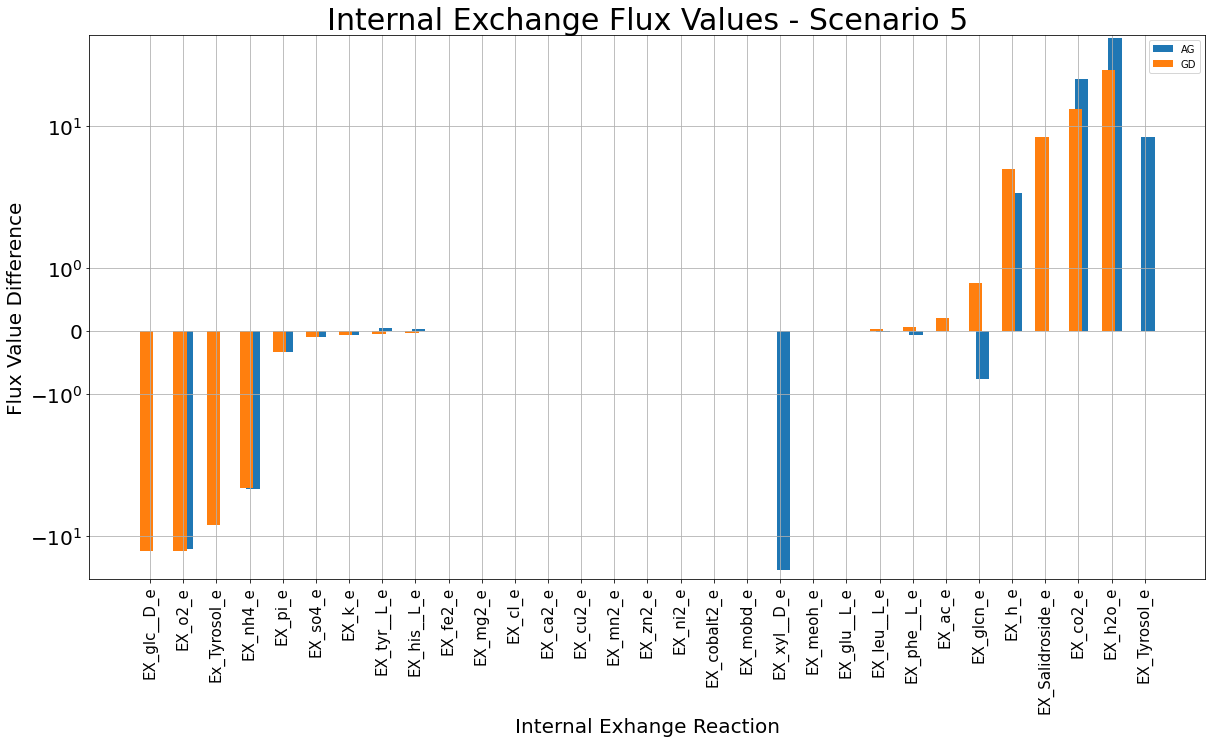

In [467]:
temp = getInternalExchangeFluxes(com,t5)
print(temp)
plotIntExchFlux(com,temp,"Internal Exchange Flux Values - Scenario 5")

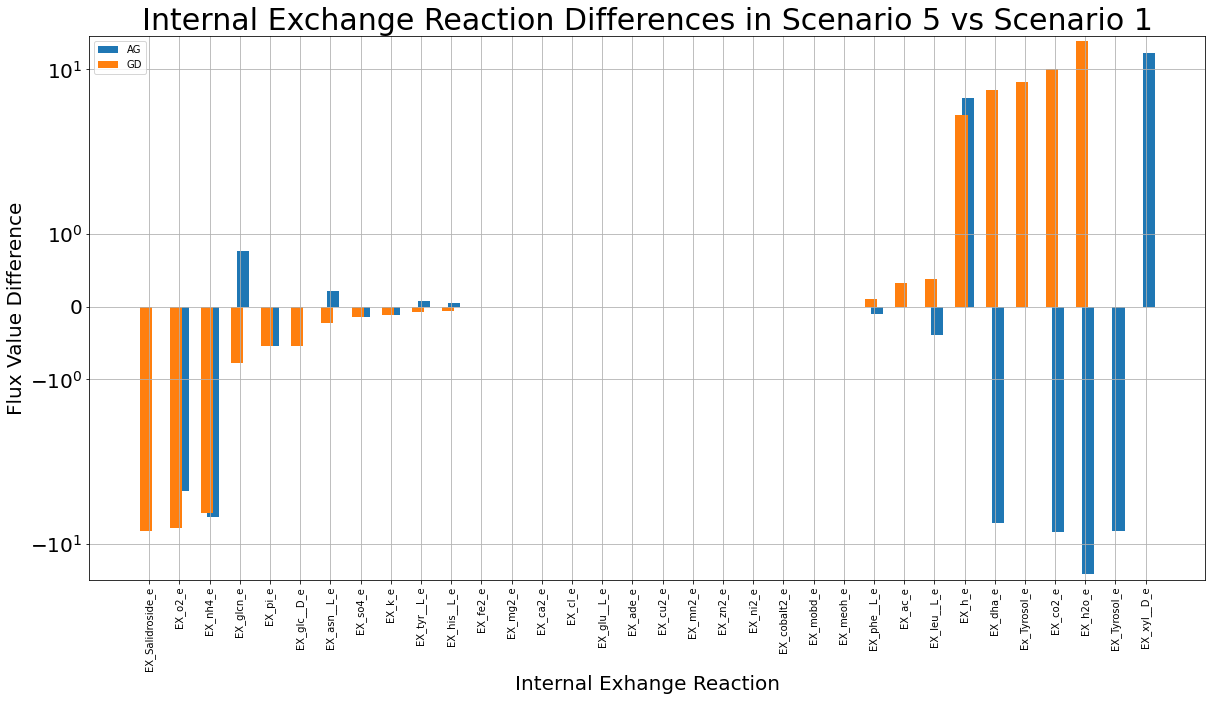

In [468]:
x = diff_internalExFluxes(com,t5,t1)
# x.to_clipboard()
plot_IntExchDiff(x,"Differences Between Internal Exchange Reactions; Scenario 5 vs Scenario 1")

## Multi-Solution Analysis
We can access the results from all of the solutions computed above by accessing the sols dictionary object


In [316]:
sols

{'t1': <CommunitySolution 0.911 at 0x2c3035e4c70>,
 't2': <CommunitySolution 0.407 at 0x2c31b362e00>,
 't3': <CommunitySolution 0.496 at 0x2c31a59d180>,
 't4': <CommunitySolution 0.872 at 0x2c3243e8910>,
 't5': <CommunitySolution 0.354 at 0x2c324930700>}

In [418]:
# So for example we can pick the for phenalalinine uptake by AG for each scenario thus:

c = 1
phe_results = []
for sol in sols.keys():
    x = sols[sol].fluxes.T.AG_uc.filter(like = 'EX_phe__L_e', axis=0).values[0]
    phe_results.append(x)
    print(f"GD Flux for: EX_phe__L_e , in test {c}", x )
    c += 1


GD Flux for: EX_phe__L_e , in test 1 -0.1682915520563986
GD Flux for: EX_phe__L_e , in test 2 -0.07531518961935148
GD Flux for: EX_phe__L_e , in test 3 -0.09188106639494285
GD Flux for: EX_phe__L_e , in test 4 -0.1616411100462351
GD Flux for: EX_phe__L_e , in test 5 -0.0655840477888088


In [415]:
x = t1.fluxes.T.AG_uc.filter(like = 'EX_phe__L_e', axis=0).values[0]
x

-0.1682915520563986

# Optcom

Quick look at whether growth coupling can be modelled properly in community with optcom - expecting not due to compensating exchange flux.

## Test 1

In [480]:
with com as m: 
    sols["o1"] = com.optcom(strategy="lmoma", pfba=True, fluxes=True, min_growth=0.3)

o1 = sols["o1"]

[13:40:31] WARNING  `optimize_all` is deprecated and will be removed soon :(                       ]8;id=297095;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py\community.py]8;;\:]8;id=528492;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py#485\485]8;;\

           WARNING  `optimize_single` is deprecated and will be removed soon :(                    ]8;id=920145;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py\community.py]8;;\:]8;id=727888;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py#446\446]8;;\

           WARNING  `optimize_single` is deprecated and will be removed soon :(                    ]8;id=45969;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py\community.py]8;;\:]8;id=321553;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py#446\446]8;;\

In [481]:
o1


,abundance,growth_rate,reactions,metabolites
compartments,,,,
AG_uc,0.5,3.322303,2587,1808
GD_uc,0.5,0.299997,2705,1880
medium,NaN,NaN,351,351


compartment        AG_uc         GD_uc
reaction                              
EX_5dglcn_e    25.497343 -2.549734e+01
EX_asp__L_e    22.998165 -2.299816e+01
EX_glc__D_e     0.000000 -2.000000e+01
EX_nh4_e      -20.308520 -1.881480e+01
EX_akg_e       17.298540 -1.729854e+01
EX_ac_e         7.569079 -7.569079e+00
EX_h_e         38.160509 -4.878055e+00
EX_o2_e       -59.680010 -3.901329e+00
EX_gly_e        0.536075 -5.360752e-01
EX_pi_e        -3.204796 -2.892106e-01
EX_hxan_e       0.126610 -1.266096e-01
EX_arg__L_e     0.088737 -8.873694e-02
EX_so4_e       -0.837918 -7.554566e-02
EX_asn__L_e     0.072316 -7.231587e-02
EX_k_e         -0.648490 -5.855729e-02
EX_tyr__L_e     0.041435 -4.143546e-02
EX_his__L_e     0.028421 -2.842108e-02
EX_indole_e     0.017053 -1.705265e-02
EX_thymd_e      0.007834 -7.833678e-03
EX_fe2_e       -0.053360 -4.818567e-03
EX_mg2_e       -0.028821 -2.602546e-03
EX_ade_e        0.002236 -2.235910e-03
EX_cl_e        -0.017293 -1.561528e-03
EX_ca2_e       -0.017293 

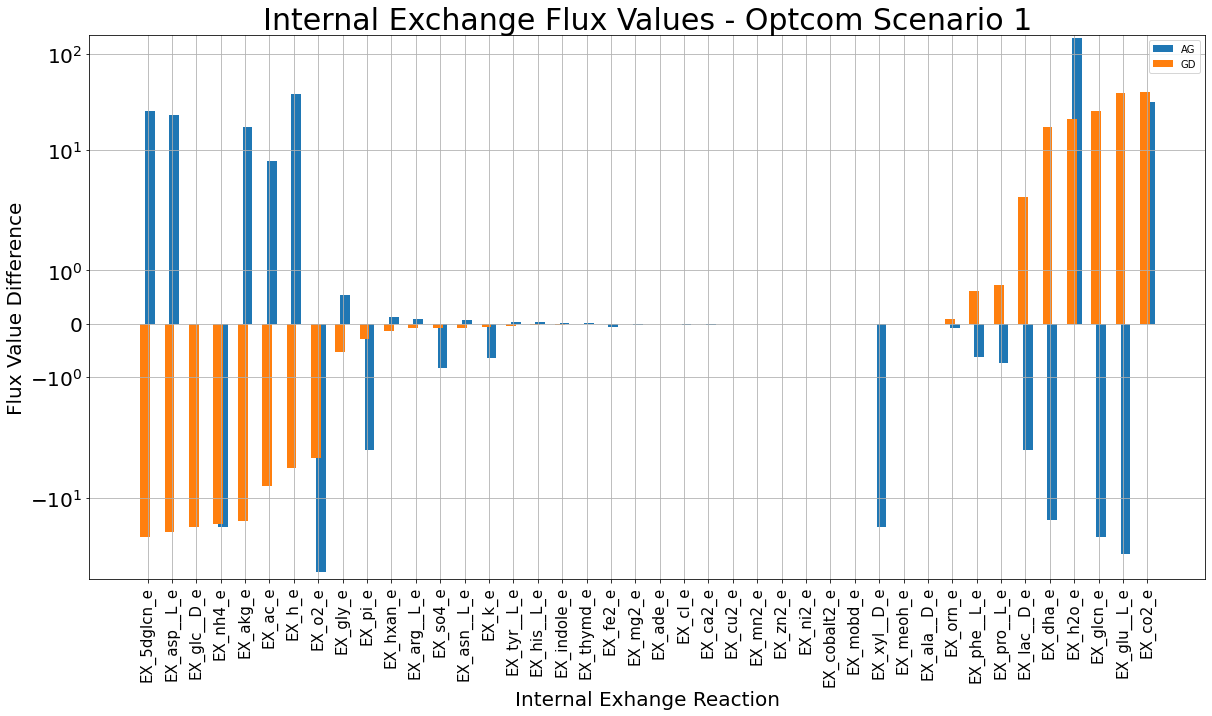

In [482]:
temp = getInternalExchangeFluxes(com,o1)
print(temp)
plotIntExchFlux(com,temp,"Internal Exchange Flux Values - Optcom Scenario 1")

## Test 4

In [470]:
# Scenario 4 but with optcom
from micom import optcom
with com as m: 
    # impose growth couple by directly constraining reactions on the GD strain.
    strat1 = [
        'TALA__GD_uc',
        'EDD__GD_uc',
        'FBA__GD_uc',
        'F6PA__GD_uc',
        'PPM2__GD_uc',
        'AGM4PApp__GD_uc',
        'INDOLEt2pp__GD_uc',
        'AGM3PApp__GD_uc'] # Target reactions to zero

    # Access reactions in the com and set bounds to 0 
    for r in [i for i in m.reactions if i.id in strat1]:
        r.bounds = (0,0)
        print("Setting ", r.id, r.bounds)

    # sols["t4"] = m.cooperative_tradeoff(fraction = 0.5, pfba=True, fluxes=True)
    sols["o4"] = m.optcom(strategy="original", pfba=True, fluxes=True)

#optcom test 4
o4 = sols["o4"] # get handle 
o4

Setting  FBA__GD_uc (0, 0)
Setting  TALA__GD_uc (0, 0)
Setting  EDD__GD_uc (0, 0)
Setting  F6PA__GD_uc (0, 0)
Setting  PPM2__GD_uc (0, 0)
Setting  AGM4PApp__GD_uc (0, 0)
Setting  INDOLEt2pp__GD_uc (0, 0)
Setting  AGM3PApp__GD_uc (0, 0)


,abundance,growth_rate,reactions,metabolites
compartments,,,,
AG_uc,0.5,3.48916,2587,1808
GD_uc,0.5,0.00000,2705,1880
medium,NaN,NaN,351,351


compartment        AG_uc      GD_uc
reaction                           
EX_asp__L_e    33.589696 -33.589696
EX_ac_e        25.363159 -25.363159
EX_akg_e       23.925990 -23.925990
EX_glc__D_e     0.000000 -20.000000
EX_idon__L_e   15.533270 -15.533270
EX_h_e         46.619180 -14.559973
EX_o2_e       -59.330095 -10.000000
EX_nh4_e      -29.179164  -8.506634
EX_quin_e       0.646419  -0.646419
EX_gly_e        0.389607  -0.389607
EX_indole_e     0.194803  -0.194803
EX_glyc__R_e    0.001167  -0.001167
EX_meoh_e       0.000007   0.000000
EX_ni2_e       -0.001127   0.000000
EX_mg2_e       -0.030268   0.000000
EX_mobd_e      -0.000450   0.000000
EX_mn2_e       -0.002411   0.000000
EX_k_e         -0.681060   0.000000
EX_xyl__D_e   -20.000000   0.000000
EX_pi_e        -3.365751   0.000000
EX_so4_e       -0.880001   0.000000
EX_zn2_e       -0.001190   0.000000
EX_cl_e        -0.018161   0.000000
EX_ca2_e       -0.018161   0.000000
EX_cobalt2_e   -0.000087   0.000000
EX_fe2_e       -0.056039   0

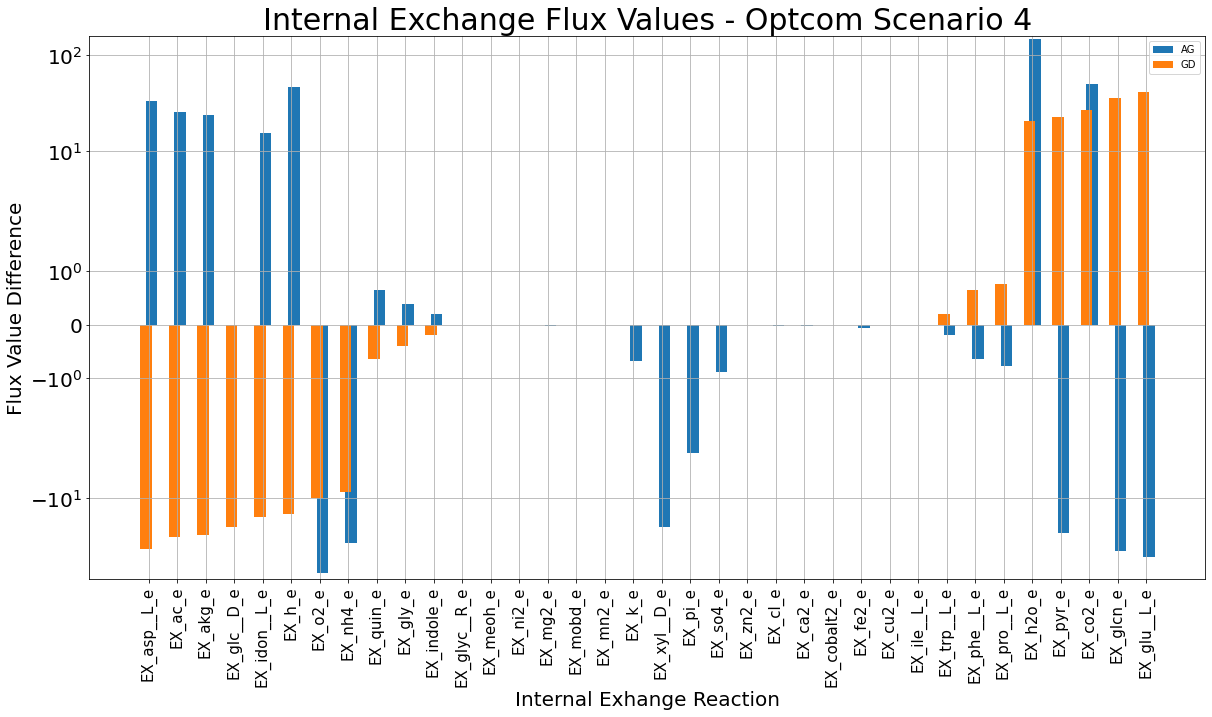

In [472]:
temp = getInternalExchangeFluxes(com,o4)
print(temp)
plotIntExchFlux(com,temp,"Internal Exchange Flux Values - Optcom Scenario 4")

o4 with minimum growth enforced

In [487]:
from micom import optcom
with com as m: 
    # impose growth couple by directly constraining reactions on the GD strain.
    strat1 = [
        'TALA__GD_uc',
        'EDD__GD_uc',
        'FBA__GD_uc',
        'F6PA__GD_uc',
        'PPM2__GD_uc',
        'AGM4PApp__GD_uc',
        'INDOLEt2pp__GD_uc',
        'AGM3PApp__GD_uc'] # Target reactions to zero

    # Access reactions in the com and set bounds to 0 
    for r in [i for i in m.reactions if i.id in strat1]:
        r.bounds = (0,0)
        print("Setting ", r.id, r.bounds)

    sols["o4_mingrowth"] = m.optcom(strategy="original", pfba=True, fluxes=True, min_growth=1.5)

# Optcom test 4
o4_mingrowth = sols["o4_mingrowth"] # get handle 

Setting  FBA__GD_uc (0, 0)
Setting  TALA__GD_uc (0, 0)
Setting  EDD__GD_uc (0, 0)
Setting  F6PA__GD_uc (0, 0)
Setting  PPM2__GD_uc (0, 0)
Setting  AGM4PApp__GD_uc (0, 0)
Setting  INDOLEt2pp__GD_uc (0, 0)
Setting  AGM3PApp__GD_uc (0, 0)


In [488]:
o4_mingrowth

,abundance,growth_rate,reactions,metabolites
compartments,,,,
AG_uc,0.5,1.872189,2587,1808
GD_uc,0.5,1.499995,2705,1880
medium,NaN,NaN,351,351


compartment        AG_uc      GD_uc
reaction                           
EX_asp__L_e    38.683805 -38.683805
EX_o2_e       -43.422812 -30.961303
EX_akg_e       24.184612 -24.184612
EX_glc__D_e     0.000000 -20.000000
EX_dha_e       17.570103 -17.570103
EX_nh4_e      -23.714358 -12.705488
EX_h_e         41.862319 -10.878296
EX_idon__L_e    4.399348  -4.399348
EX_pi_e        -1.805972  -1.446061
EX_gly_e        1.061765  -1.061765
EX_ser__L_e     0.949493  -0.949493
EX_ins_e        0.670178  -0.670178
EX_quin_e       0.626088  -0.626088
EX_arg__L_e     0.443687  -0.443687
EX_so4_e       -0.472185  -0.377730
EX_asn__L_e     0.361581  -0.361581
EX_k_e         -0.365438  -0.292788
EX_tyr__L_e     0.207178  -0.207178
EX_his__L_e     0.142106  -0.142106
EX_indole_e     0.085264  -0.085264
EX_thymd_e      0.039169  -0.039169
EX_fe2_e       -0.030069  -0.024093
EX_mg2_e       -0.016241  -0.013013
EX_cl_e        -0.009745  -0.007808
EX_ca2_e       -0.009745  -0.007808
EX_adn_e        0.002271  -0

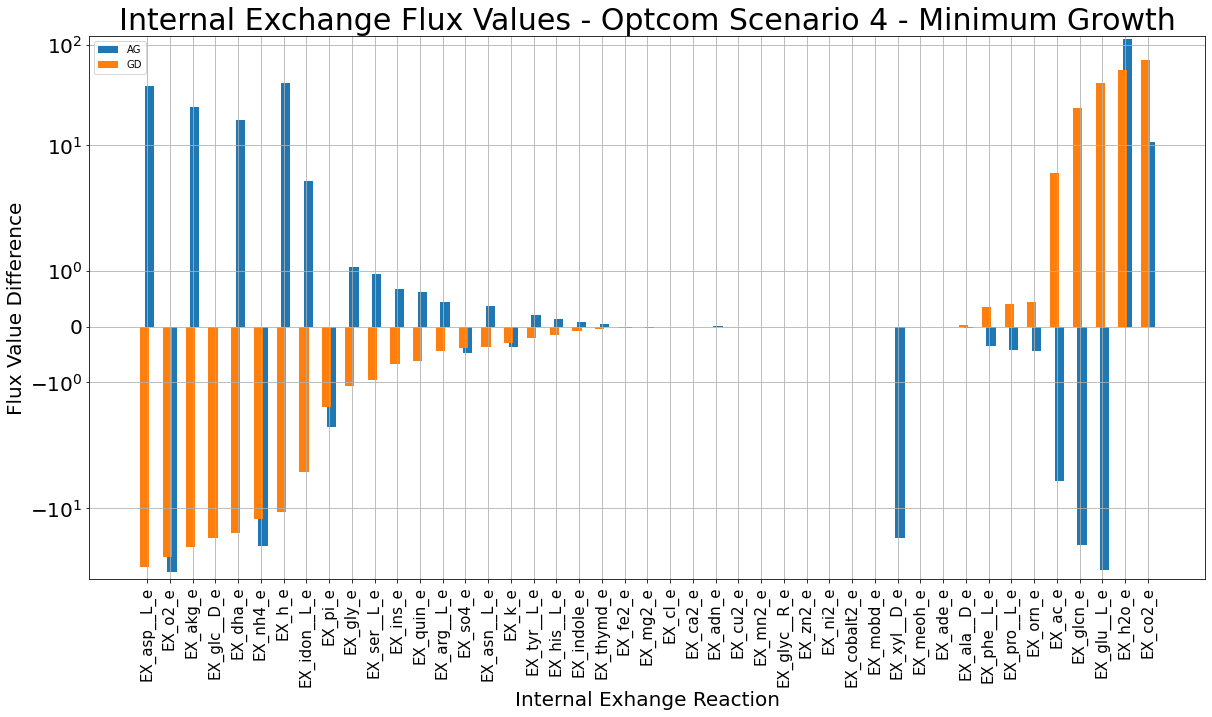

In [489]:
temp = getInternalExchangeFluxes(com,o4_mingrowth)
print(temp)
plotIntExchFlux(com,temp,"Internal Exchange Flux Values - Optcom Scenario 4 - Minimum Growth")

# Tradeoff Scan & Snapshots of Inflection Point
Note compare the pre-tradeoff uptakes to the individual species uptakes.

In [501]:
com.medium

{'EX_co2_m': 1000.0,
 'EX_cobalt2_m': 1000.0,
 'EX_glc__D_m': 10.0,
 'EX_h_m': 1000.0,
 'EX_h2o_m': 1000.0,
 'EX_k_m': 1000.0,
 'EX_cu2_m': 1000.0,
 'EX_mg2_m': 1000.0,
 'EX_mn2_m': 1000.0,
 'EX_mobd_m': 1000.0,
 'EX_na1_m': 1000.0,
 'EX_nh4_m': 1000.0,
 'EX_ca2_m': 1000.0,
 'EX_cbl1_m': 0.01,
 'EX_ni2_m': 1000.0,
 'EX_o2_m': 1000.0,
 'EX_cl_m': 1000.0,
 'EX_pi_m': 1000.0,
 'EX_xyl__D_m': 10.0,
 'EX_zn2_m': 1000.0,
 'EX_sel_m': 1000.0,
 'EX_slnt_m': 1000.0,
 'EX_so4_m': 1000.0,
 'EX_tungs_m': 1000.0,
 'EX_fe2_m': 1000.0,
 'EX_fe3_m': 1000.0}

In [21]:
temp = com.cooperative_tradeoff(fraction=0.91, fluxes=True, pfba=True)

In [22]:
temp

,abundance,growth_rate,reactions,metabolites
compartments,,,,
AG_uc,0.5,1.658476,2587,1808
GD_uc,0.5,1.658468,2705,1880
medium,NaN,NaN,351,351


In [23]:
# coop_scan_sols = com.cooperative_tradeoff(fraction = np.arange(0.9,1.01,0.01), fluxes=True,pfba=True) # not working for some reason

coop_scan_sols = []
fractions = [0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1]
for frac in fractions:
    try:
        coop_scan_sols.append(com.cooperative_tradeoff(fraction = frac, fluxes=True,pfba=True))
    except:
        print("Failied with fraction of: ", frac)
        coop_scan_sols.append(False)
    
# print([i.growth_rate for i in coop_scan_sols.solution.values])

import pickle
with open("coop_scan_sols.pickle", 'wb') as fp:
    pickle.dump(coop_scan_sols,fp)

print(coop_scan_sols)


Failied with fraction of:  0.97
Failied with fraction of:  0.98
Failied with fraction of:  0.99
Failied with fraction of:  1
[<CommunitySolution 1.640 at 0x1a7a8bc51b0>, <CommunitySolution 1.658 at 0x1a7a6ca47c0>, <CommunitySolution 1.677 at 0x1a7a70de9e0>, <CommunitySolution 1.695 at 0x1a7a5be4d00>, <CommunitySolution 1.713 at 0x1a7a3861450>, <CommunitySolution 1.731 at 0x1a7a8c03a30>, <CommunitySolution 1.750 at 0x1a7a6ca7d60>, False, False, False, False]


In [ ]:
coop_scan_sols = mc.load_pickle("coop_scan_sols.pickle")

In [ ]:
rates = coop_scan_sols.solution.apply(lambda x: x.members.growth_rate)
rates = rates[["AG_uc","GD_uc"]]
# a = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]
a = [0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1]
a.reverse()
rates["fraction"] = a
rates

In [34]:
temp = coop_scan_sols[6]
temp.members.growth_rate

compartments
AG_uc     1.749602
GD_uc     1.749592
medium         NaN
Name: growth_rate, dtype: float64

In [ ]:
# # Plot the effect of the change in cooperative tradeoff valaue.
# import matplotlib as mp
# import matplotlib.pyplot as plt

# fig,ax = plt.subplots()
# # plt.figure(figsize=(5, 5), dpi=200)
# ax.plot(rates["fraction"],rates["AG_uc"],label="AG uc",linestyle = ":")
# ax.plot(rates["fraction"],rates["GD_uc"],label="GD uc",linestyle = ":")
# ax.plot(rates["fraction"], [i.growth_rate for i in sols.solution.values],label="Com",linestyle = "-.")

# ax.set_title("AG vs GD Growth Rates")
# ax.set_xlabel("Cooperative Tradeoff Value")
# ax.set_ylabel("Consitiuent Growth Rate")
# ax.legend()
# plt.savefig('Coop_Tradeoff_scan_basic_media.jpg',bbox_inches='tight', dpi = 200) # Save with increased size, png does not influde axis so use jpg.


And now have a look at a snapshot of the internal exchanges.

In [ ]:
# might have to actually load this to work out the iteration logic.
# come back to when optimized

# temp = getInternalExchangeFluxes(com,t1)
# print(temp)
# plotIntExchFlux(com,temp,"Internal Exchange Flux Values - Scenario 1")

# Break

In [ ]:
# t1.fluxes.T.to_clipboard()
key_fluxes = [
    "",
    ""
] 

In [ ]:
'''
When we have generated a soluton for a community model we will want to extract relevant flux values for salient reactions.
items: 
Community uptake fluxes.
Individual uptake & secretion fluxes.
aaa fluxes
product fluxes 
cross fed metabolites- This 

'''
# np.sign()

def extract_relevant_fluxes(com_model):
    pass

In [ ]:
def same_sign(a,b):
    # Used to find exchange reactions that differ in sign between the model components
    # as it it suggestive of cross feeding.
    return abs(a) + abs(b) == abs(a+b)


False
